ML Course, Bogotá, Colombia  (&copy; Josh Bloom; June 2019)

In [2]:
%run ../talktools.py

# Self-supervised Learning

Not all historical "answers" known in inference problems. Sometimes we look for structure without the ability to score: clustering. Sometimes we want to find lower-dimensional embeddings of large-dimensional data.

## Clustering

<img src="https://www.evernote.com/l/AUWSPWZPSkNAL6GLEX37sIbG7gYbvSUyR6UB/image.png">

### KMeans

In [1]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import datasets
dataset = datasets.load_iris()
X = dataset.data
y = dataset.target

In [2]:
import numpy as np
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=3, random_state=1).fit(X)
labels = kmeans_model.labels_

In [3]:
list(zip(labels, y))

[(1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (0, 1),
 (0, 1),
 (2, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (2, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (2, 2),
 (0, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (0, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 

From [sklearn](http://scikit-learn.org/stable/modules/clustering.html):

*"Evaluating the performance of a clustering algorithm is not as trivial as counting the number of errors or the precision and recall of a supervised classification algorithm. In particular any evaluation metric should not take the absolute values of the cluster labels into account but rather if this clustering define separations of the data similar to some ground truth set of classes or satisfying some assumption such that members belong to the same class are more similar that members of different classes according to some similarity metric."*

*Fowlkes-Mallows* can be used when the ground truth class assignments of the samples is known.

In [4]:
metrics.fowlkes_mallows_score(y, labels)

0.8208080729114153

If the ground truth labels are not known, evaluation must be performed using the model itself.   *Silhouette Coefficient*: a higher score relates to a model with better defined clusters.

In [5]:
metrics.silhouette_score(X, labels, metric='euclidean')

0.5528190123564091

### DBSCAN

"DBSCAN - Density-Based Spatial Clustering of Applications with Noise. Finds core samples of high density and expands clusters from them. Good for data which contains clusters of similar density...This implementation is by default not memory efficient because it constructs a full pairwise similarity matrix in the case where kd-trees or ball-trees cannot be used (e.g. with sparse matrices). This matrix will consume <b>n<sup>2</sup></b> floats."

http://scikit-learn.org/stable/modules/clustering.html#dbscan

In [6]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

In [7]:
centers = [[1, 1, 0,1], [-1, -1, 2,-1.5], [1, -1, -1,1]]
X, labels_true = make_blobs(n_samples=1000, centers=centers, cluster_std=0.5,
                            random_state=42)

X = StandardScaler().fit_transform(X)
xs = X[:,0] ; ys = X[:,1] ; zs = X[:,2]

In [8]:
X.shape

(1000, 4)

In [9]:
set(labels_true)

{0, 1, 2}

<IPython.core.display.Javascript object>


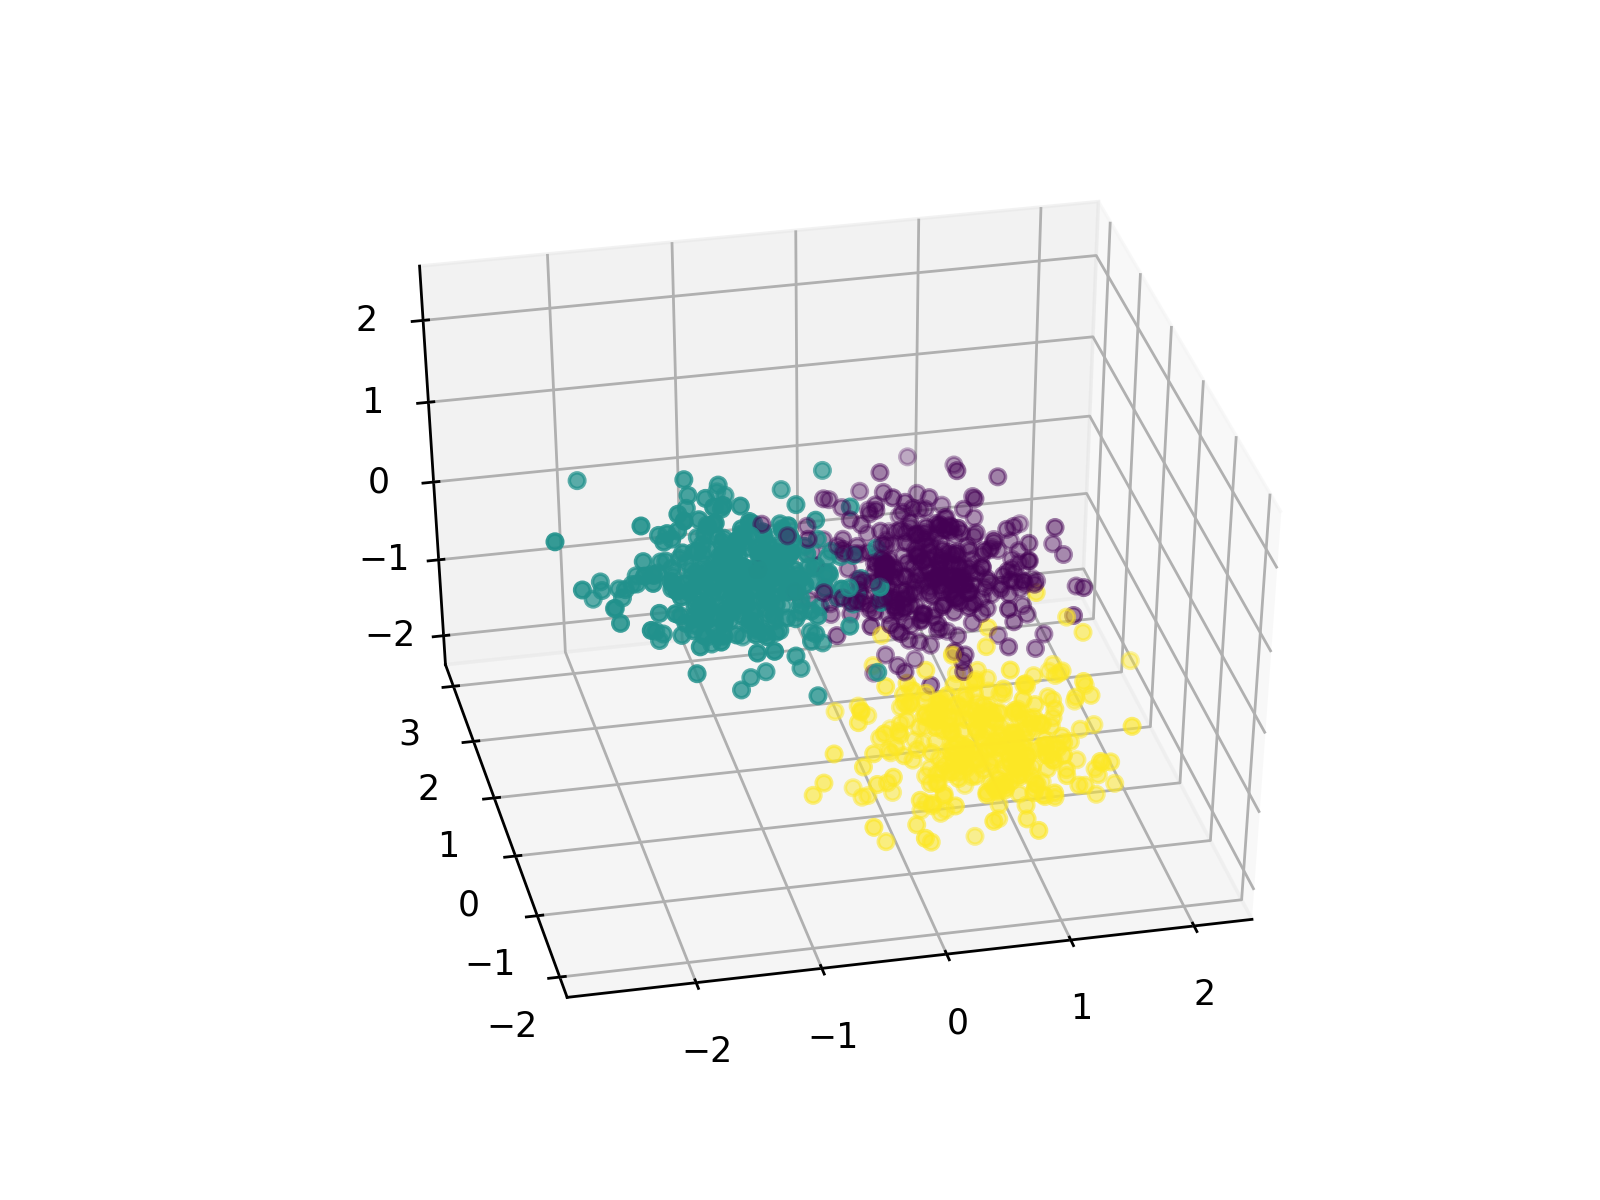

In [10]:
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs=zs, c=labels_true)

In [11]:
db = DBSCAN(eps=0.4, min_samples=10,algorithm="kd_tree",n_jobs=-1).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Estimated number of clusters: 3
Homogeneity: 0.615
Completeness: 0.500
V-measure: 0.552
Adjusted Rand Index: 0.413
Adjusted Mutual Information: 0.499
Silhouette Coefficient: 0.195


/Users/jbloom/anaconda3/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


<IPython.core.display.Javascript object>


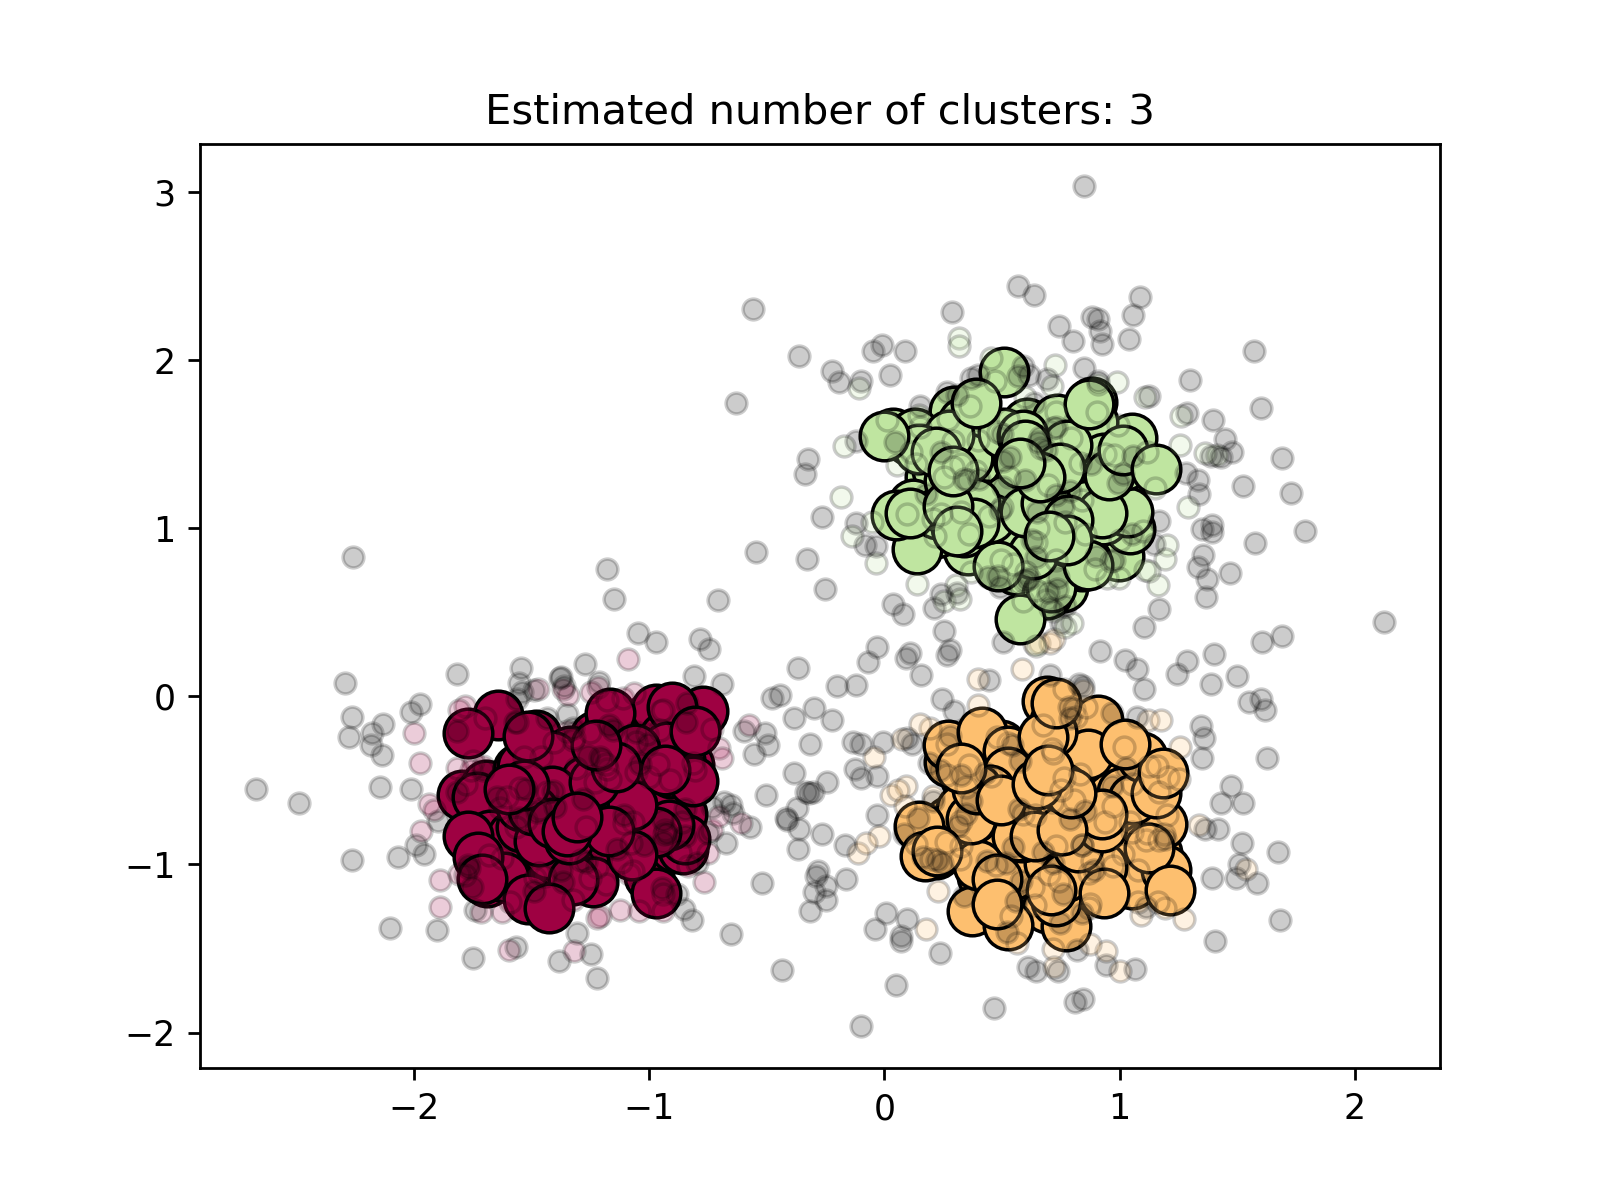

Text(0.5, 1.0, 'Estimated number of clusters: 3')

In [12]:
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6,alpha=0.2)

plt.title('Estimated number of clusters: %d' % n_clusters_)

## Unsupervised Random Forest


> The idea is to use the similarity matrix generated from a RF predictor that distinguishes observed from “synthetic” data. The observed data are the original, unlabeled data while the synthetic data are drawn from a reference distribution. A synthetic class outcome is defined by labeling the observed data by class 1 and the synthetic data by class 2. By restricting the resulting labeled similarity measure to the observed data, one can define a similarity measure between unlabeled observations.

URF (Unsupervised Random Forest, or Random Forest Clustering) is a python implementation of the paper: Shi, T., & Horvath, S. (2006). Unsupervised learning with random forest predictors. Journal of Computational and Graphical Statistics, 15(1), 118-138.

In [ ]:
!conda install -c bioconda pycluster -y

In [ ]:
!pip install URF

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from Pycluster import kcluster

from URF.main import random_forest_cluster, plot_cluster_result, unsupervised_random_forest
digits = load_digits()
X = digits.data
y = digits.target
# print(len(list(set(y))))

clf, prox_mat = unsupervised_random_forest(X, n_estimators=100, max_depth=50)
prox_mat = 1 - prox_mat  # make disimilarity matrix

cluster_ids, error, n_found = kcluster(prox_mat, nclusters=10, method="m")

# clf, prox_mat, cluster_ids = random_forest_cluster(X, k=3, max_depth=20, random_state=0)
# plot_cluster_result(prox_mat, cluster_ids, 2, y)

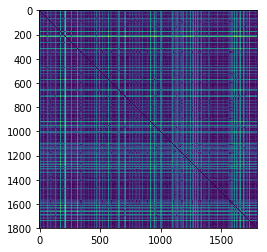

In [14]:
plt.imshow(prox_mat)

In [15]:
from sklearn.manifold import MDS

embedding = MDS(n_components=2, dissimilarity="precomputed")
X_transformed = embedding.fit_transform(prox_mat)
X_transformed.shape

(1797, 2)

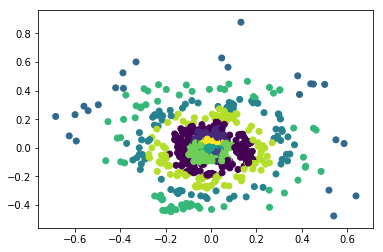

In [16]:
plt.scatter(X_transformed[:,0],X_transformed[:,1],c=cluster_ids)

# Dimensionality Reduction

In our toy example above, we have a 4-D distribution over 3 clusters. Let's say we wish to find a lower-D space to transform our data. We can use [Principal Component Analysis](https://en.wikipedia.org/wiki/Principal_component_analysis) (PCA), to identify the (linear) combination of attributes that account for most of the variance in the data.

> PCA is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables...into a set of values of linearly uncorrelated variables called principal components. --Wikipedia

<img src="https://learnche.org/pid/_images/geometric-PCA-5-and-6-first-component-with-projections-and-second-component.png">

(Source: https://learnche.org/pid/latent-variable-modelling)

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3, svd_solver='full')
pca.fit(X)
print(pca.explained_variance_ratio_)

[0.14890594 0.13618771 0.11794594]


In [18]:
X_r = pca.transform(X)

In [19]:
X_r

array([[ -1.25946645,  21.27488348,  -9.46305462],
       [  7.9576113 , -20.76869896,   4.43950604],
       [  6.99192297,  -9.95598641,   2.95855808],
       ...,
       [ 10.8012837 ,  -6.96025223,   5.59955453],
       [ -4.87210009,  12.42395362, -10.17086635],
       [ -0.34438963,   6.36554919,  10.77370849]])

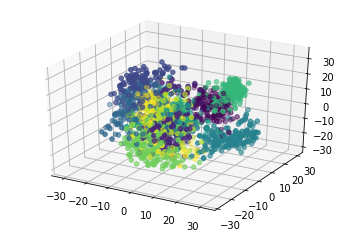

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_r[:,0],X_r[:,1],X_r[:,2], c=y)

"Linear Discriminant Analysis (LDA) tries to identify attributes that account for the most variance between classes. In particular, LDA, in contrast to PCA, is a supervised method, using known class labels."

In [23]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X,y)
print(lda.explained_variance_ratio_) 

[0.28912041 0.18262788]


/Users/jbloom/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


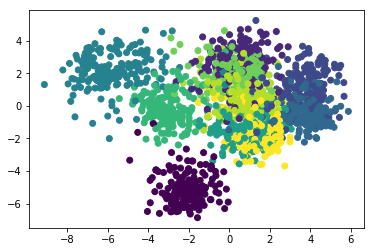

In [24]:
X_r = lda.transform(X)
plt.scatter(X_r[:,0], X_r[:,1], c=y)

In [25]:
X_r.shape

(1797, 2)

In [26]:
from sklearn import datasets

digits = datasets.load_digits()

X = digits.data
y = digits.target

In [27]:
lda = LinearDiscriminantAnalysis(n_components=3)
lda.fit(X,y)
print(lda.explained_variance_ratio_) 

[0.28912041 0.18262788 0.16962345]


/Users/jbloom/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


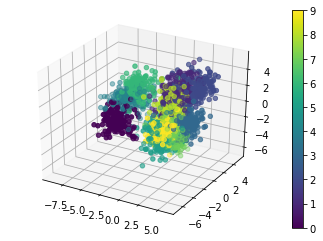

In [28]:
X_r = lda.transform(X)

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

cax=ax.scatter(X_r[:,0],X_r[:,1],X_r[:,2],c=y)
cbar = fig.colorbar(cax)

## Manifold Learning

non-linear dimensionality reduction

In [29]:
%matplotlib notebook 
from sklearn import manifold
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


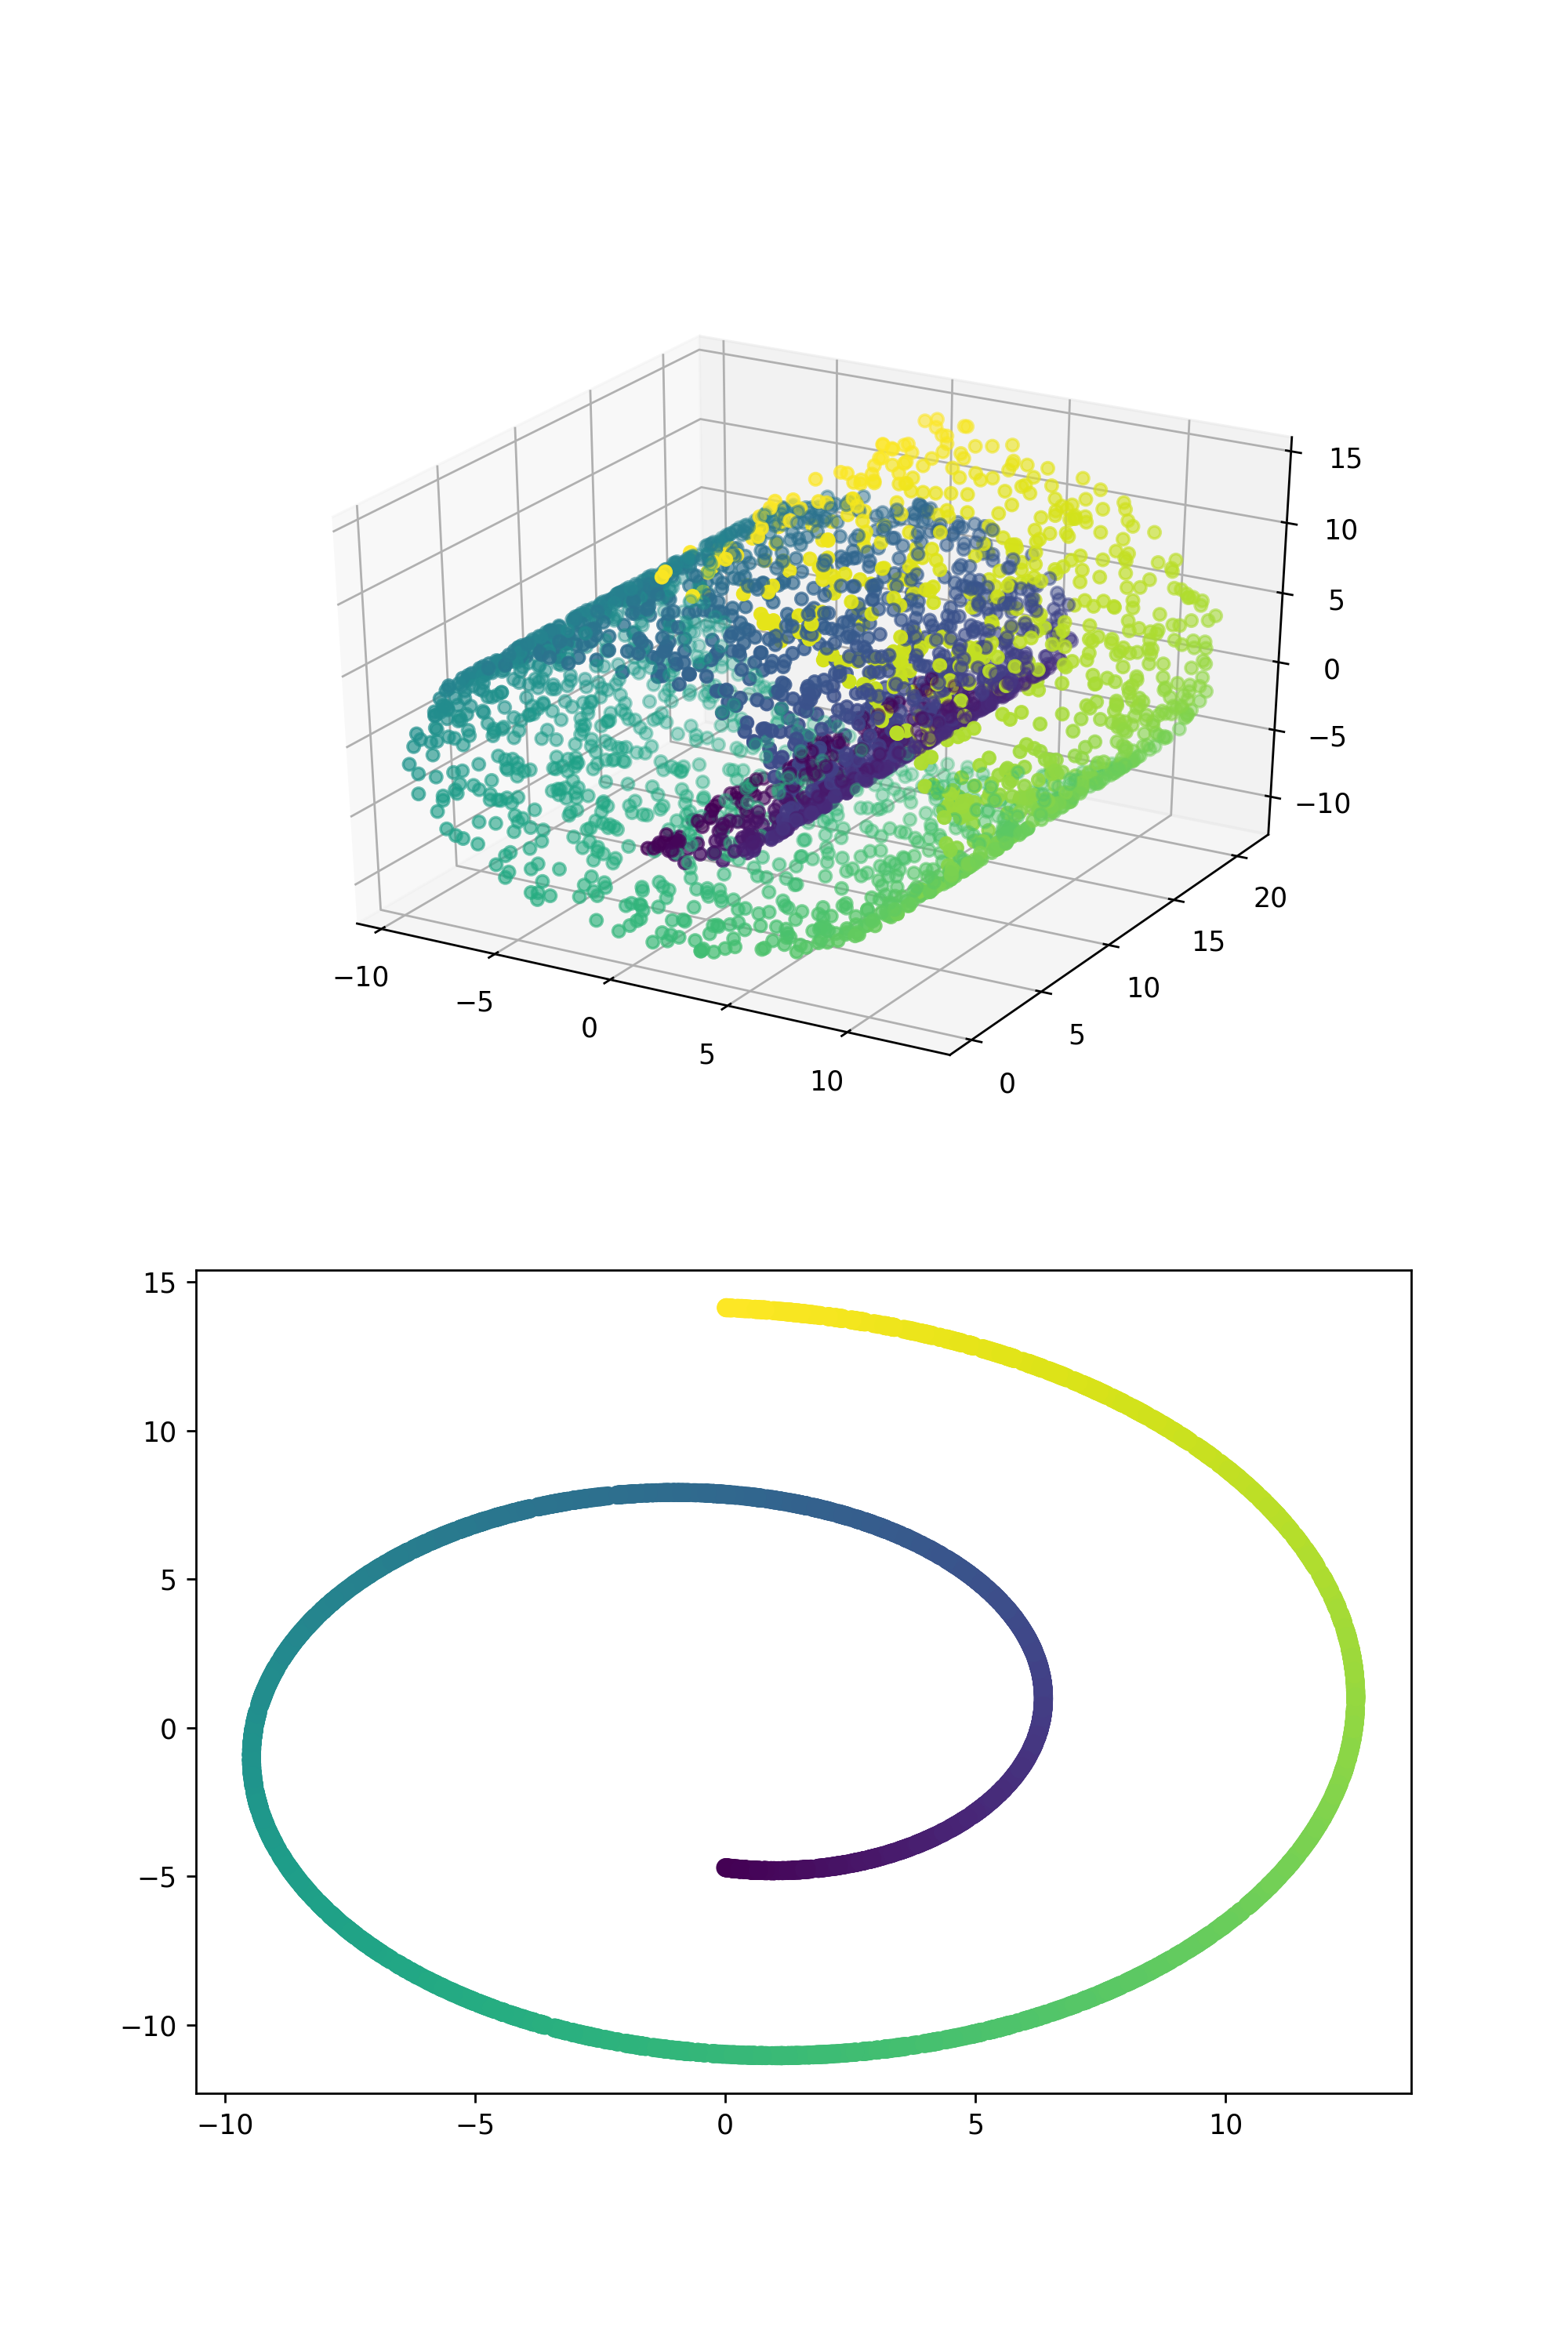

In [30]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

n_points = 3000
X, t = datasets.samples_generator.make_swiss_roll(n_samples=n_points)
fig = plt.figure(figsize=(8,12))
ax = fig.add_subplot(211, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=t)

ax1 = fig.add_subplot(212)
ax1.scatter(X[:,0], X[:,2], c=t)

In [ ]:
manifold.LocallyLinearEmbedding?

<IPython.core.display.Javascript object>


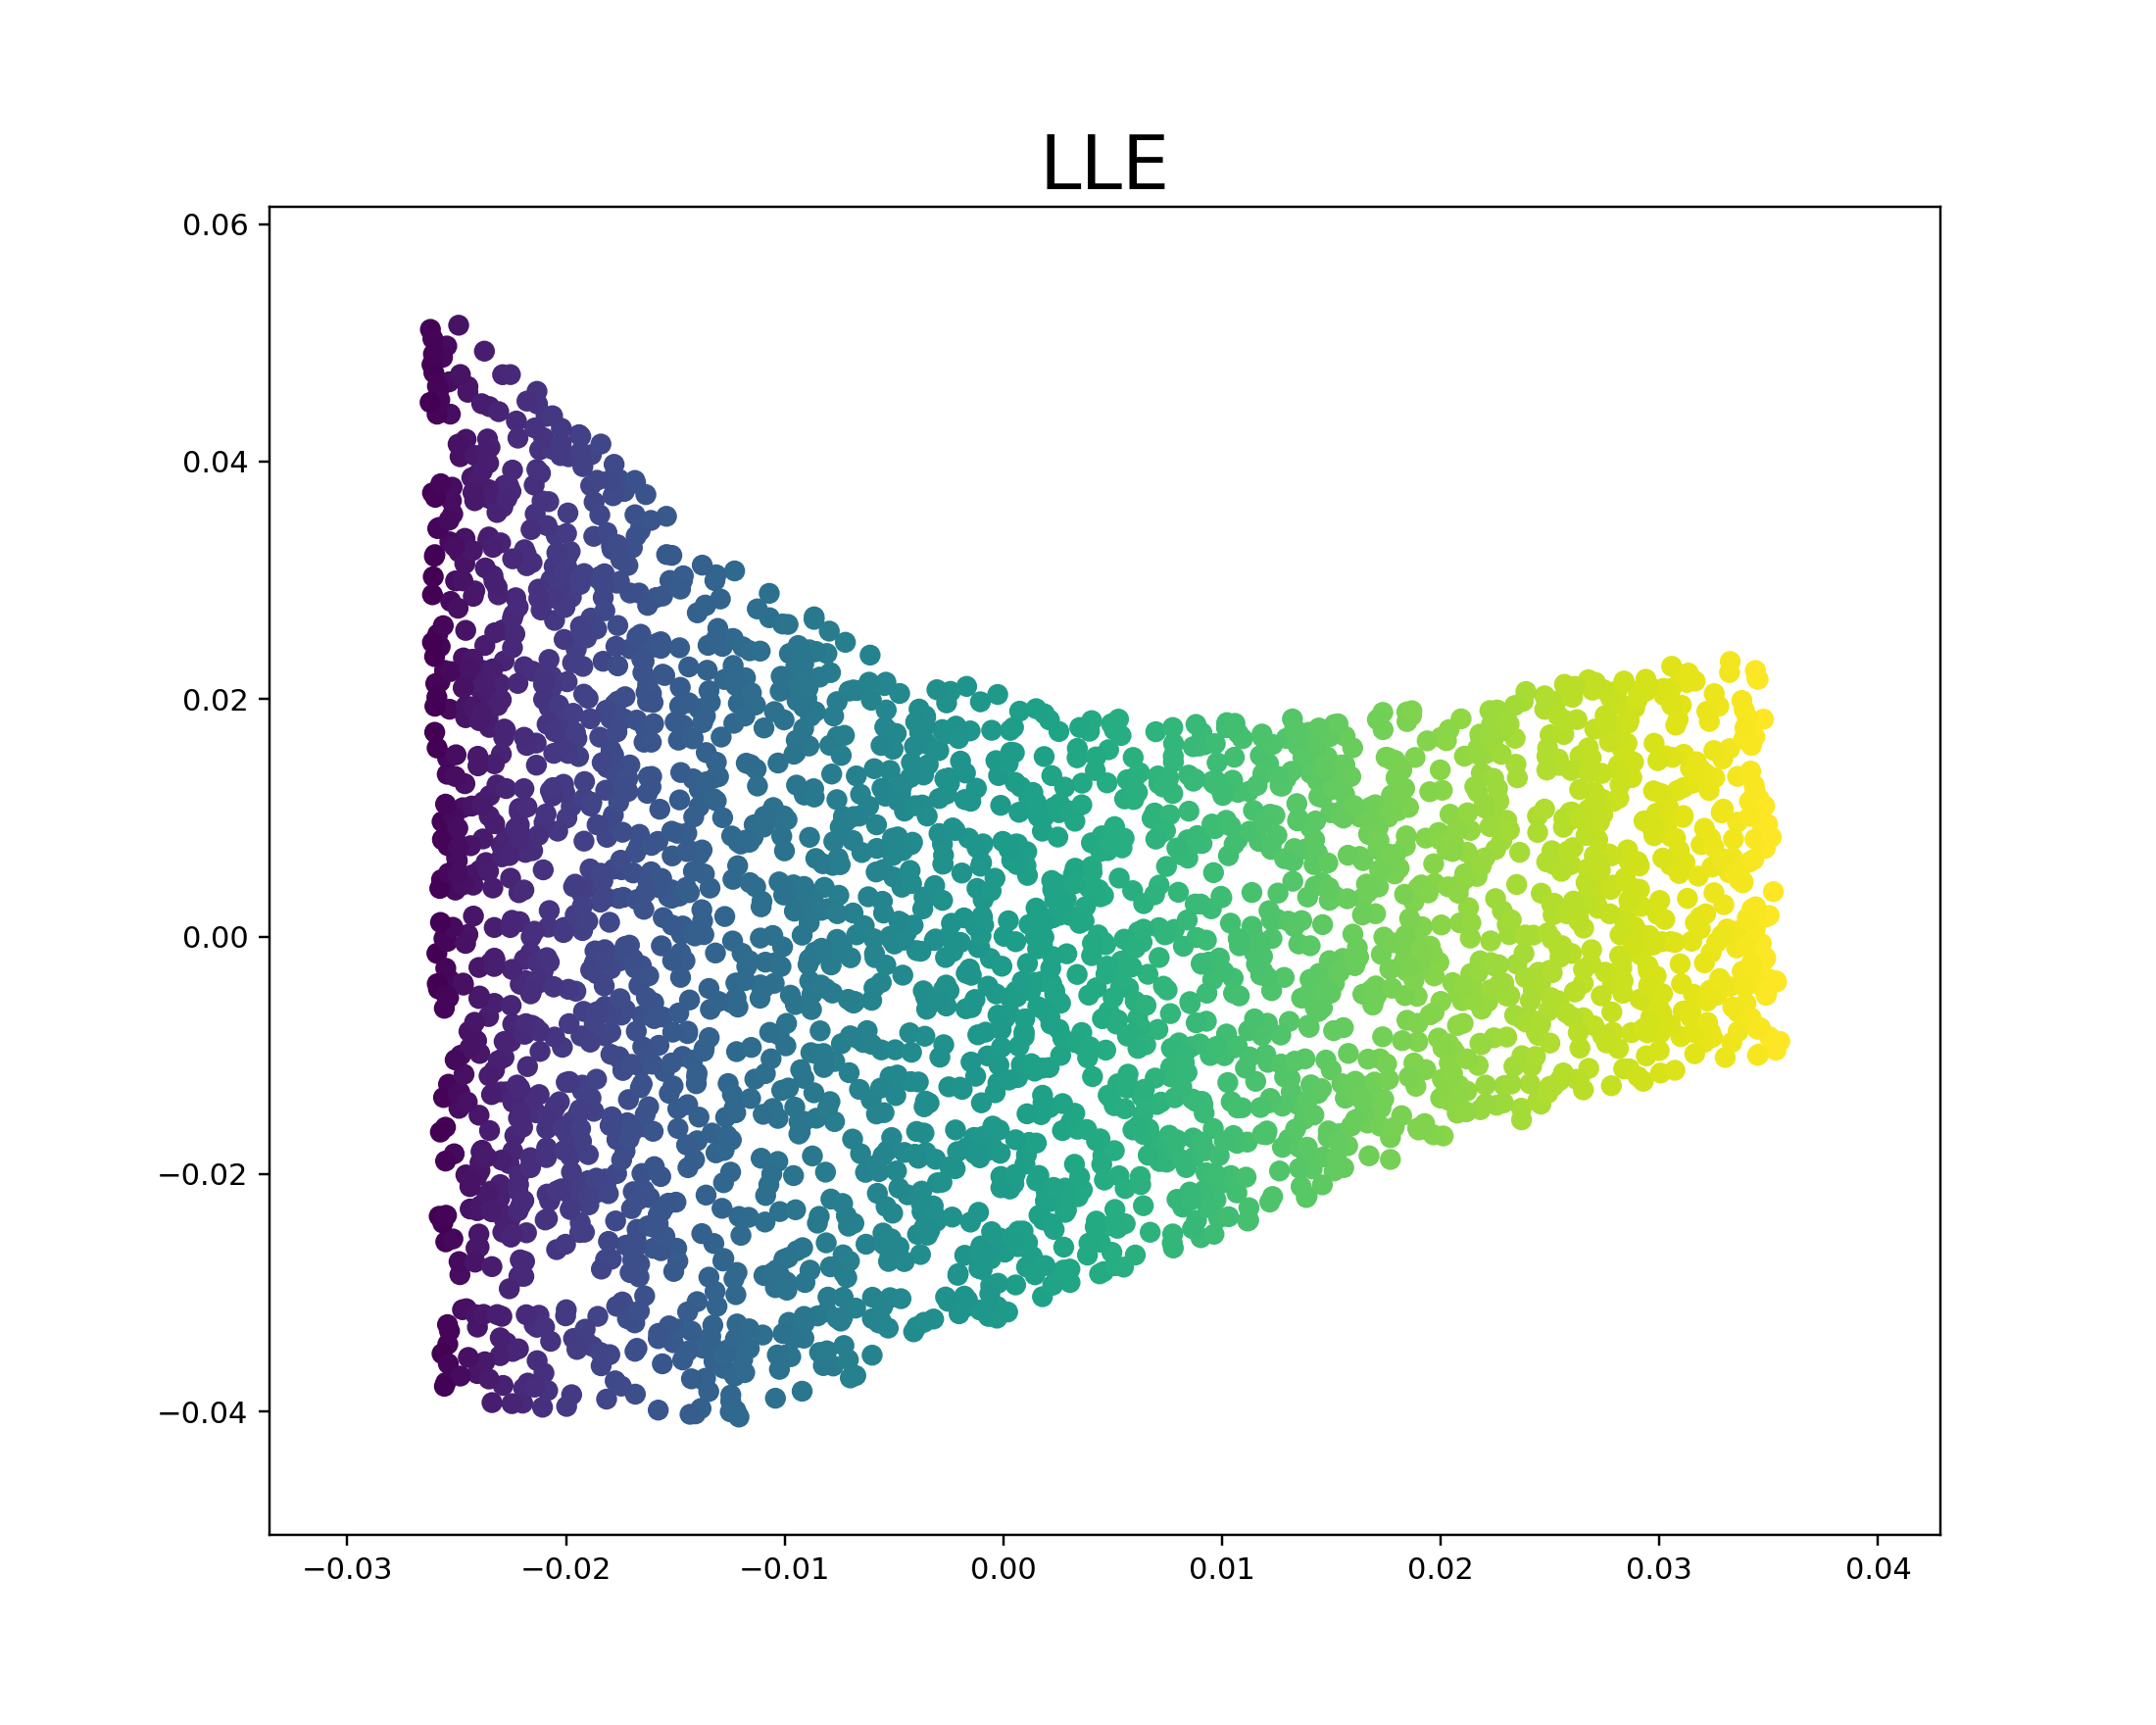

Text(0.5, 1.0, 'LLE')

In [31]:
## Locally Linear Embedding .... like PCA on the local scale (preserving neighborhood distances).

from sklearn import manifold
out_dim = 2
n_neighbors = 20

Y = manifold.LocallyLinearEmbedding(n_neighbors, out_dim, eigen_solver='auto',\
                                    method='standard').fit_transform(X)
plt.figure(figsize=(10, 8))
plt.scatter(Y[:, 0], Y[:, 1], c=t)
plt.title("LLE",size=25)

In [ ]:
manifold.Isomap?

<IPython.core.display.Javascript object>


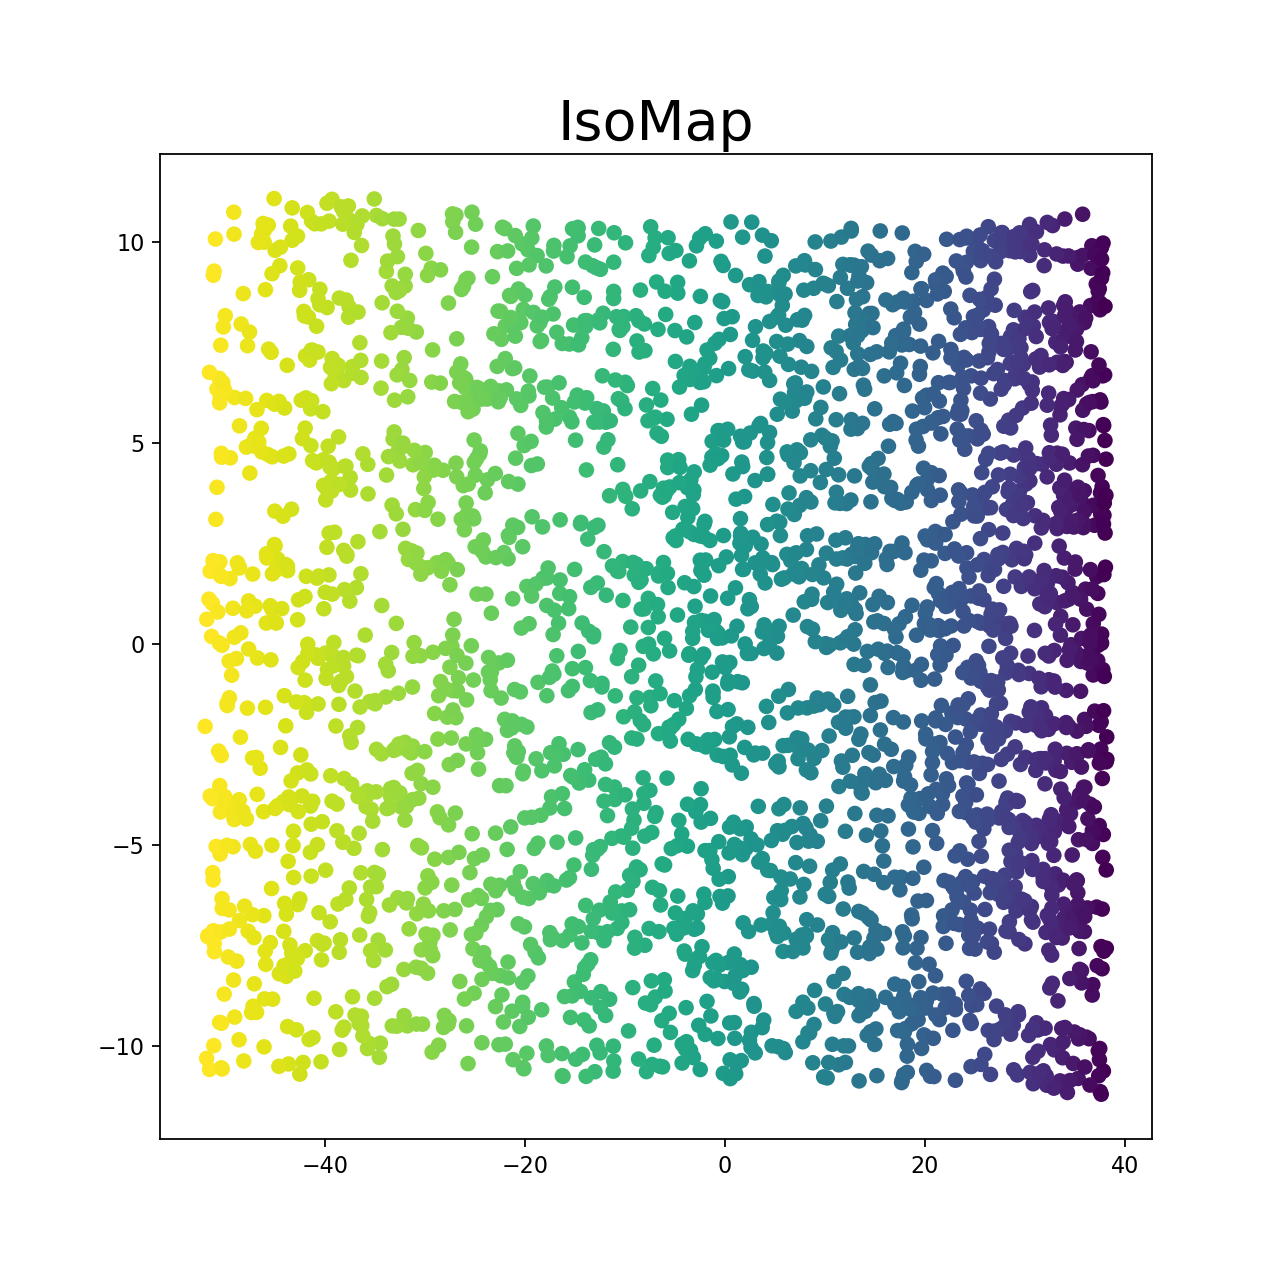

Text(0.5, 1.0, 'IsoMap')

In [32]:
# IsoMap is a non-linear kernel PCA
Y = manifold.Isomap(n_neighbors, out_dim).fit_transform(X)

plt.figure(figsize=(8, 8))
plt.scatter(Y[:, 0], Y[:, 1], c=t)
plt.title("IsoMap",size=25)

## t-SNE

t-distributed Stochastic Neighbor Embedding.

t-SNE [1] is a tool to visualize high-dimensional data. It converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data. t-SNE has a cost function that is not convex, i.e. with different initializations we can get different results.

<i>"It is highly recommended to use another dimensionality reduction method (e.g. PCA for dense data or TruncatedSVD for sparse data) to reduce the number of dimensions to a reasonable amount (e.g. 50) if the number of features is very high."</i>

http://scikit-learn.org/stable/modules/manifold.html#t-sne


In [33]:
from sklearn.datasets import load_iris
iris = load_iris()

In [34]:
X = iris.data
y = iris.target

In [35]:
tsne = manifold.TSNE(n_components=2, init='random', random_state=0, perplexity=20, verbose=1)
X_tsne = tsne.fit_transform(X)

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 150 samples in 0.000s...
[t-SNE] Computed neighbors for 150 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 150 / 150
[t-SNE] Mean sigma: 0.385932
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.312450
[t-SNE] KL divergence after 1000 iterations: 0.186504


Text(0.5, 1.0, 't-SNE')

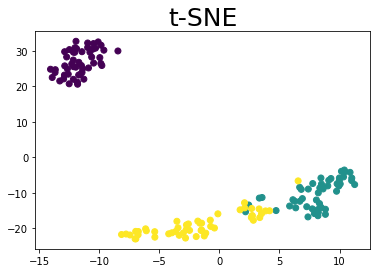

In [36]:
%matplotlib inline
plt.scatter(X_tsne[:,0],X_tsne[:,1],c=y)
plt.title("t-SNE",size=25)

## UMAP

Uniform Manifold Approximation and Projection

"model the manifold with a fuzzy topological structure. The embedding is found by searching for a low dimensional projection of the data that has the closest possible equivalent fuzzy topological structure."

McInnes, L, Healy, J, UMAP: Uniform Manifold Approximation and Projection for Dimension Reduction, ArXiv e-prints 1802.03426, 2018

https://arxiv.org/abs/1802.03426

In [ ]:
#!pip install umap-learn

In [37]:
import umap
from sklearn.datasets import load_digits

digits = load_digits()

embedding = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(digits.data)

/Users/jbloom/anaconda3/lib/python3.6/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


In [38]:
import os
os.environ.update({"BOKEH_RESOURCES": "inline"})

In [39]:
from bokeh.plotting import figure, output_file
from bokeh.models import CategoricalColorMapper, ColumnDataSource
from bokeh.palettes import Category10
from bokeh.io import output_notebook, show
output_notebook()

Loading BokehJS ...

In [40]:
targets = [str(d) for d in digits.target_names]

source = ColumnDataSource(dict(
    x = [e[0] for e in embedding],
    y = [e[1] for e in embedding],
    label = [targets[d] for d in digits.target]
))

cmap = CategoricalColorMapper(factors=targets, palette=Category10[10])

p = figure(title="test umap")
p.circle(x='x',
         y='y',
         source=source,
         color={"field": 'label', "transform": cmap},
         legend='label')

show(p)

/Users/jbloom/anaconda3/lib/python3.6/site-packages/bokeh/core/json_encoder.py:80: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(type(obj), np.float):
